<a href="https://colab.research.google.com/github/sobiya1234/Machine-Learning/blob/main/ML_Assignment_3_%E2%80%93_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#1.	Explore the Dataset:

1.1.	Understand the Data: Begin by getting an overview of the dataset. Check the type and amount of data available, and understand the structure of the dataset.

In [ ]:
# Load the dataset
file_path = 'https://raw.githubusercontent.com/sobiya1234/Mobiles_Data/refs/heads/main/mobile_price.csv'
df = pd.read_csv(file_path)

# Display basic info about the dataset
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [ ]:
df_head = df.head()
df_head

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [ ]:
df_shape = df.shape
df_shape

(161, 14)

1.2.	Examine Statistical Summary: Look at basic statistics of the dataset to understand the distribution of features.

In [ ]:
# Get statistical summary of the dataset
df_description = df.describe()
df_description

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


1.3.	Correlation Analysis: Create a heatmap to visualize the correlation matrix. Focus on the relationship between the features and the target variable 'Price'.

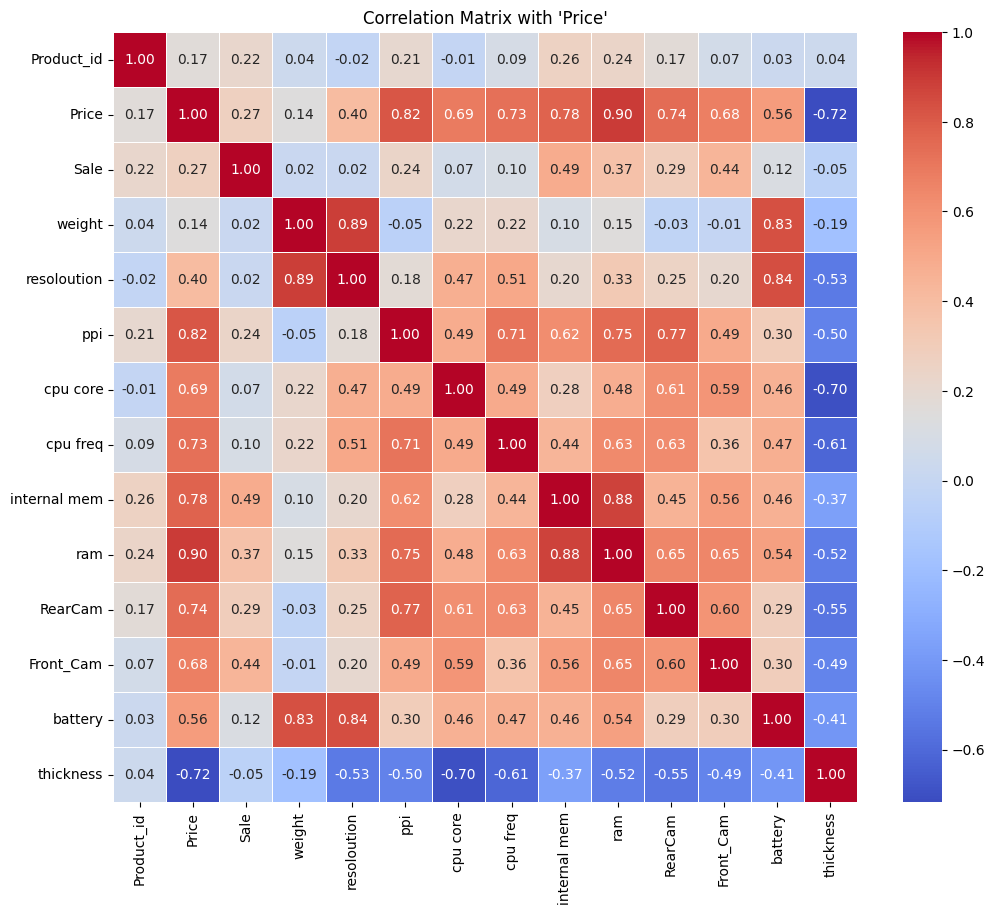

In [ ]:
# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix with 'Price'")
plt.show()



1.4.	Relationship Analysis: Identify the top 4 features that show the highest correlation with the target variable 'Price'. For each of these features, plot a scatter plot to observe how well each feature correlates with 'Price'. Display all four scatter plots side by side in a single figure.

In [ ]:
# Sort correlations with 'Price' and get top 4 features (excluding 'Price' itself)
price_corr = corr_matrix['Price'].drop('Price').sort_values(ascending=False)
top_4_features = price_corr.head(4)
top_4_features

,Price
ram,0.896915
ppi,0.817614
internal mem,0.776738
RearCam,0.739538


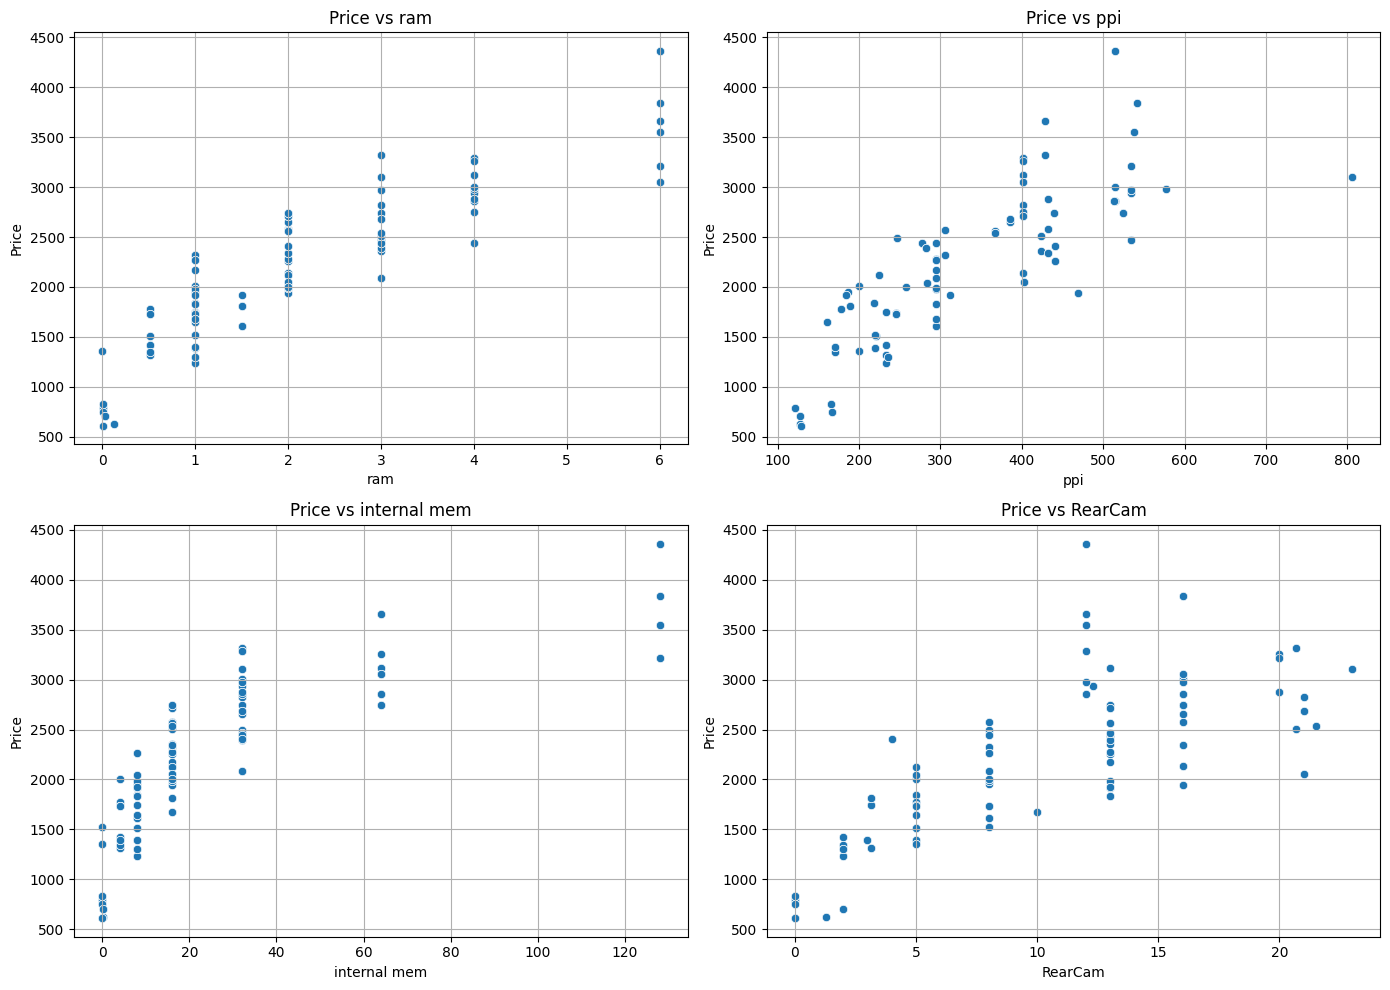

In [ ]:
# Plotting scatter plots for top 4 correlated features with 'Price'
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
features = top_4_features.index.tolist()

for i, feature in enumerate(features):
    row, col = divmod(i, 2)
    sns.scatterplot(data=df, x=feature, y='Price', ax=axs[row][col])
    axs[row][col].set_title(f'Price vs {feature}')
    axs[row][col].grid(True)

plt.tight_layout()
plt.show()

#2.	Prepare the Data:

2.1.	Feature Selection: Select the features and the target variable for your analysis.

In [ ]:
df.shape

(161, 14)

In [ ]:
df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [ ]:
# 2.1 Feature Selection
features = ['ram', 'ppi', 'internal mem', 'RearCam']
target = 'Price'

X = df[features]
y = df[target]

In [ ]:
from sklearn.model_selection import train_test_split

2.2.	Split the Dataset: Divide the dataset into training and testing sets. Use 80% of the data for training and 20% for testing.

In [ ]:
# 2.2 Split the Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [ ]:
X_train.shape

(128, 4)

In [ ]:
X_test.shape

(33, 4)

In [ ]:
y_train.shape

(128,)

In [ ]:
y_test.shape

(33,)

#3.	Build and Train the Model:

3.1.	Create a Linear Regression Model: Build a linear regression model using the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

3.2.	Train the Model: Fit the model to the training data.

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([236.81278162,   1.57978158,   2.12994249,  23.32227967])

In [ ]:
X_train.shape , y_train.shape

((128, 4), (128,))

In [ ]:
model.intercept_

np.float64(878.962339191839)

In [ ]:
X_train.head(2)

,ram,ppi,internal mem,RearCam
155,6.0,538,128.0,12.0
96,2.0,367,16.0,13.0


In [ ]:
#y=m1X1+m2X2+m3X3+c

In [ ]:
X_test.head()

,ram,ppi,internal mem,RearCam
23,3.0,524,32.0,16.0
18,1.5,294,8.0,8.0
5,2.0,401,16.0,16.0
103,2.0,432,16.0,16.0
143,3.0,424,16.0,20.7


In [ ]:
y_test.head()

,Price
23,2744
18,1612
5,2137
103,2343
143,2508


#4.	Evaluate the Model:

4.1.	Predict: Use the model to make predictions on the test set.

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([2858.52086791, 1902.25507432, 2393.31587177, 2442.28910085,
       2776.07834424, 1482.9931515 , 1726.6841077 , 2780.81913152,
       2899.21183537, 1636.47254693, 1847.53278274, 1071.06316188,
       1596.97800735, 1593.81844418, 1143.74163448, 2500.74101943,
       1423.46392155, 2403.69822781, 1512.38813955, 2234.34313202,
       2442.28910085, 2804.35184474, 3077.95605211, 1083.70141455,
       1933.31702871, 3467.27523205, 1556.86260574, 2513.08683328,
       2210.71885887, 1311.53005417, 1406.54277348, 1857.14945519,
       2154.31240336])

In [ ]:
model.predict([[3.0,524,32.0,16]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2858.52086791])

In [ ]:
#y=m1X1+m2X2+m3X3+m4X4+c
#X1=3.0,X2=524.5,X3=32.0.X4=16
#[ m1= 236.81278162,  m2 = 1.57978158 , m3= 2.12994249 , m4= 23.32227967]
#
#c=878.962339191839

In [ ]:
sample_data=236.81278162 * 3.0 + 1.57978158 * 524.5 + 2.12994249 * 32.0 + 23.32227967 * 16 + 878.962339191839
sample_data

2859.310757161839

In [ ]:
newdf = X_test.copy()

In [ ]:
newdf.head()

,ram,ppi,internal mem,RearCam
23,3.0,524,32.0,16.0
18,1.5,294,8.0,8.0
5,2.0,401,16.0,16.0
103,2.0,432,16.0,16.0
143,3.0,424,16.0,20.7


In [ ]:
newdf['Actual_Sales_y_test'] = y_test
newdf.head()

,ram,ppi,internal mem,RearCam,Actual_Sales_y_test
23,3.0,524,32.0,16.0,2744
18,1.5,294,8.0,8.0,1612
5,2.0,401,16.0,16.0,2137
103,2.0,432,16.0,16.0,2343
143,3.0,424,16.0,20.7,2508


In [ ]:
newdf['Predicted_Sales'] = y_pred
newdf.head()

,ram,ppi,internal mem,RearCam,Actual_Sales_y_test,Predicted_Sales
23,3.0,524,32.0,16.0,2744,2858.520868
18,1.5,294,8.0,8.0,1612,1902.255074
5,2.0,401,16.0,16.0,2137,2393.315872
103,2.0,432,16.0,16.0,2343,2442.289101
143,3.0,424,16.0,20.7,2508,2776.078344


4.2.	Metrics Calculation: Evaluate the model’s performance using the following metrics:

➢	Slope (Coefficient) and Intercept: Print the slope (coefficient) and intercept of the regression line.

In [ ]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [236.81278162   1.57978158   2.12994249  23.32227967]
Intercept: 878.962339191839


➢	Model Performance Metrics: Calculate and report the following metrics:


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

 R² Score: How well does the model explain the variance in the target variable?

In [ ]:
r2_score ( y_test, y_pred)

0.8121936313353548

Mean Absolute Error (MAE): What is the average absolute difference between predicted and actual values?

In [ ]:
mae = mean_absolute_error (y_test, y_pred )
print("Mean Absolute Error:", mae)

Mean Absolute Error: 233.84176872700897


Mean Squared Error (MSE): What is the average of the squared differences between predicted and actual values?

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 73144.80602330137


#5.	Conclude the Analysis:

5.1.	Model Evaluation: Based on the performance metrics, assess how well the model predicts mobile prices. Discuss whether the model’s performance is satisfactory or if there are areas for improvement.

High R² Score (close to 1) suggests a good fit.

Low MAE and MSE indicate accurate predictions.

Satisfactory performance if predictions closely match actual values and residuals are randomly distributed.

5.2.	Insights and Discussion:

1.What insights did you gain from the correlation analysis and scatter plots?


★ Insights from Correlation and Scatter Plots :

RAM had the strongest positive correlation with price.

PPI, Internal Memory, and Rear Camera also significantly affect price.

2.How do the selected features contribute to the prediction of mobile prices?

★ Feature Contributions :

Higher values of these features generally lead to higher prices.

Coefficients quantify the price change per unit increase in each feature.

3.What do the slope (coefficient) and intercept reveal about the relationship between the features and the target variable?

★ Coefficients and Intercept Meaning :

Intercept: Base price when all features are zero.

Coefficients: Show how much price changes with each unit change in that feature

4.How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?

★ Model Performance :

If R² is high, and MAE/MSE are low, the model generalizes well.

If predictions consistently over or under-estimate, there may be bias.



5.What might be some potential improvements or additional steps you could take to enhance the model’s performance?

★ Potential Improvements :

Add more features (e.g., brand, screen type).

Try polynomial regression or tree-based models for non-linear relationships.

Use cross-validation for robust evaluation.

Normalize or scale the data if features vary greatly in range.